# Spotify Song Streams Prediction using Linear Regression
The objective is to implement a machine learning algorithm from scratch using the ”Most Streamed Spotify Songs 2023”.
The dataset contains several features about songs in the Spotify library. Task is to predict a target variable using the features provided in the dataset. The target variable in this dataset could be the "streams" of the song, which represents the total number of streams on Spotify.

In [1]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("spotify-2023.csv")

# Display the first few rows of the dataset
# data.head()
# Displaying data description
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Data Preprocessing
Methods for below preprocessing tasks are created and are called through a parent function below called 'data_preprocessing'

## 1. Converting Categorical to numeric 
Creating a function to replace categorical values in dataset such as Keys and Mode to numeric values. Keys are converted to their respective piano key frequencies and Mode is converted using One-Hot-Encoding method (ie. Major = 1 and Minor = 0)

## 2. Handling Missing Values
Non-Numeric values in dataset are replaced with NaN and later NaN and missing values are replaced with the median of the attribute

## 3. To int
All attribute columns are converted to integer datatype to ensure uniformity

In [2]:
# Define utility functions
def categorical_to_numeric(data):
    # Converting categorical values in data set to numeric attributes
    # Mapping of musical keys to frequencies (in Hz)
    key_to_frequency = {
        'A': 440,
        'A#': 466,
        'B': 494,
        'C': 523,
        'C#': 554,
        'D': 587,
        'D#': 622,
        'E': 659,
        'F': 699,
        'F#': 740,
        'G': 784,
        'G#': 831
    }

    # Replace the kyes of the track in the 'key' column with their frequencies
    data['key'] = data['key'].map(key_to_frequency)

    # Replace Major with 1 and minor with 0 in the mode column
    data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})
    return data

def impute_missing_values(data):
    # Iterate through numeric columns
    for column in data.columns[2:]:
        # Convert non-numeric values to NaN
        data[column] = pd.to_numeric(data[column], errors='coerce')
    
        # Fill missing values with median
        median = round(data[column].median(),2)
        data.fillna({column: median}, inplace=True)
    return data



def to_int(data):
    # Iterate through columns starting from the third column
    for column in data.columns[2:]:
        # Convert the data type of each column to integer
        data[column] = data[column].astype(int)
    return data






In [3]:
# Preprocess data
def data_preprocessing(data):
    
    # Convert Categorical to Numeric
    data = categorical_to_numeric(data)
    
    # Handle missing values by filling with median of the column
    data = impute_missing_values(data)

    # Convert all columns to int
    data = to_int(data)
    
    # Normalize data
    #data = normalize_variables(data)

    return data

data = data_preprocessing(data)

# Correlating Attributes

## Display correlations between features and target
The data set contains many columns but very few actually have strong correlation with data. using Pandas corr() function, a heatmap displaying relationships between features is produced

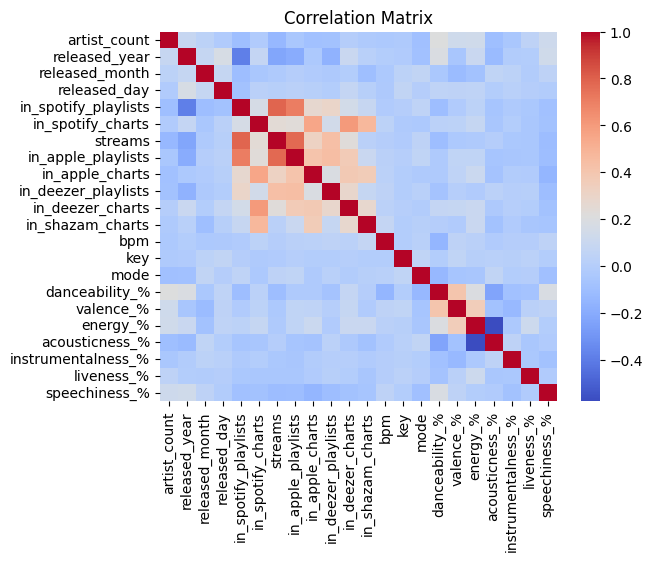

In [4]:
# Display correlations between features and target

numeric_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 
                  'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 
                  'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 
                  'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 
                  'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
                  'liveness_%', 'speechiness_%']

# Correlation matrix to understand relationships between features
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# # Calculate correlations with 'streams' column for numeric columns
# correlations = data[numeric_columns].corrwith(data['streams'])

# # Sort correlations in descending order
# correlations = correlations.sort_values(ascending=False)

# # Plotting
# plt.figure(figsize=(10, 8))
# sns.barplot(x=correlations.values, y=correlations.index)
# plt.title('Correlation with Streams')
# plt.xlabel('Correlation Coefficient')
# plt.ylabel('Feature')
# plt.show()

## Dropping columns
Columns with absolute correlation less than 0.2 are removed. This includes the columns like artist_count, released_month, released_day, in_shazam_charts, bpm , key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%,  liveness_%, speechiness_%

These columns would be usefull for other type of analysis but have weak correlation with the target variable 

In [5]:
# Dropping columns with absolute correlation less than 0.2
dropped_columns = ['artist_count','released_month', 'released_day', 
                  'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 
                  'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 
                  'liveness_%', 'speechiness_%']

data = data.drop(columns = dropped_columns)

## Displaying relationships with strong correlation
The remaining columns in the data set either have a strong positive or negative correlation with the taget variable.

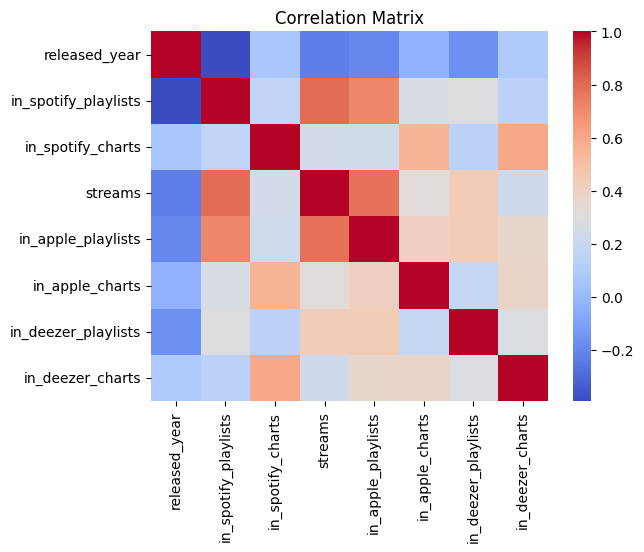

In [6]:
# Correlation matrix to understand relationships between features

numeric_columns = ['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 
                   'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Normalizing
Normalizing the Data using Min-Max Scaling.

$$ normalized\_value = \frac{ current\_value + min(attribute) }{ max(attribute)) - min(attribute) } $$

The dataframe returned by data.describe() is stored to later un-scale the actual and predicted values after prediction

In [7]:
# Normalize the data
data_desc = data.describe()
data_desc = data_desc.drop(['count','std','25%','50%','75%'])
print('Before Scalling:\n',data.describe())

# Function to normalize numerical variables
for column in data.columns[2:]:
    # Normalize numerical variables using min-max scaling
    data[column] = (data[column] - data_desc[column]['min']) / (data_desc[column]['max']- data_desc[column]['min'])
print('After Scalling:\n',data.describe())


Before Scalling:
        released_year  in_spotify_playlists  in_spotify_charts       streams  \
count     953.000000            953.000000         953.000000  9.530000e+02   
mean     2018.238195           5200.124869          12.009444  5.139028e+08   
std        11.116218           7897.608990          19.575992  5.666055e+08   
min      1930.000000             31.000000           0.000000  2.762000e+03   
25%      2020.000000            875.000000           0.000000  1.417210e+08   
50%      2022.000000           2224.000000           3.000000  2.905309e+08   
75%      2022.000000           5542.000000          16.000000  6.738011e+08   
max      2023.000000          52898.000000         147.000000  3.703895e+09   

       in_apple_playlists  in_apple_charts  in_deezer_playlists  \
count          953.000000       953.000000           953.000000   
mean            67.812172        51.908709           103.627492   
std             86.441493        50.630241           172.435729   
mi

# Spliting the data
Since the requirement mentions not to use any machine learning packages such as sklearn, pytorch, tensorflow, a split_data fucntion is created below similar to sklearn.train_test_split(). 
The data set is split into training and testing set with ration 80:20, by adding a randonm seed we make sure to shuffle the data before spliting.

In [8]:
def split_data(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # Calculate the number of samples in the test set
    test_samples = int(X.shape[0] * test_size)
    
    # Split the data
    X_train = X_shuffled[:-test_samples]
    X_test = X_shuffled[-test_samples:]
    y_train = y_shuffled[:-test_samples]
    y_test = y_shuffled[-test_samples:]
    
    return X_train, y_train, X_test, y_test


# Defining LinearRegression Class
The below cell defines a linear regression model that uses gradient descent to minimize the mean squared error (MSE) loss function:

## 1. Mean Squared Error (MSE) Function (mean_squared_error):
1. Calculates the mean squared error between the predicted values and the actual target values.
2. It takes the parameters theta0, theta, X, and y as inputs.
3. Uses the function f(theta0, theta, X) to compute the predicted values.
4. Linear Regression Function (f(theta0, theta, X)):

## 2. Function f
1. It takes the parameters theta0, theta, and X as inputs.
2. Computes the predicted values using the linear equation np.dot(X, theta) + theta0.
   
## 3. Linear Regression Class (LinearRegression):
1. Initializes the linear regression model with a specified step size for gradient descent.
2. Theta = Weights of each attribute in the dataset
3. Theta0 = Bias used along with the weights.

    ### 3.1. The fit method:
    1. Performs gradient descent optimization to minimize the MSE loss function.
    2. Initializes the parameters theta and theta0 randomly.
    3. Updates theta using the gradient descent algorithm until the convergence criterion (threshold) is met.
    4. Computes the gradient of the MSE loss function with respect to the parameters using the mse_gradient method.
    5. Prints the MSE loss at every 100th iteration for monitoring the training progress.
   
    ### 3.2. The mse_gradient method:
    1. Computes the gradient of the MSE loss function with respect to the parameters theta and theta0.
    2. It takes the parameters theta0, theta, X, and y as inputs.

    ### 3.3. The predict method:
    Predicts the target values for new input data X using the learned parameters theta and theta0.

In [9]:
def mean_squared_error(theta0, theta, X, y):
    return 0.5*np.mean((y-f(theta0, theta, X))**2)

def f(theta0, theta, X):
        return np.dot(X, theta) + theta0


class LinearRegression:
    # Initializing the values for hyperparameters
    def __init__(self, step_size=0.3):
        self.step_size = step_size
        self.theta = None
        self.theta0 = None

    # The actual training function
    def fit(self, X, y, threshold=1e-7):
        # Extracting dimensions of feature set
        n_samples, n_features = X.shape
        
        # Random initialization of Theta using numpy.random
        self.theta = np.random.random(size=n_features)
        self.theta0 = np.random.random()
        
        # Gradient descent optimization
        theta_prev = np.ones(n_features)
        iter = 0
        opt_pts = [self.theta]
        opt_grads = []
        
        while np.linalg.norm(self.theta - theta_prev) > threshold:
            theta_prev = self.theta


            gradient = self.mse_gradient(self.theta0, self.theta, X_train, y_train)
            self.theta = theta_prev - self.step_size * gradient
            opt_pts += [self.theta]
            opt_grads += [gradient]

            if iter % 100 == 0:
                print('Iteration %d. MSE: %.6f' % (iter, mean_squared_error(self.theta0, self.theta, X_train, y_train)))
            
            iter += 1 
            
           
    def mse_gradient(self, theta0, theta, X, y):
        return np.mean((f(theta0, theta, X) - y) * X.T, axis=1)
    
        
    def predict(self, X):
        return np.dot(X, self.theta) + self.theta0

# Splitting the data
The attributes and target variable are separated into X and y.
using the previously defined split_data function, we split the dataset into train and test set

In [10]:
X = data.drop(['track_name', 'artist(s)_name', 'streams'], axis=1)
y = data['streams']

# Split the dataset into train and test set
X_train, y_train, X_test, y_test = split_data(X.values, y.values, test_size=0.2, random_state=42)

# Training and Predicting
We create an instance of the LinearRegression class and pass the training set.
Using the fit function, we train the model

The Predict method outputs prediction (streams) for given test set X_test.

In [11]:
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Iteration 0. MSE: 0.209389
Iteration 100. MSE: 0.005653
Iteration 200. MSE: 0.004153
Iteration 300. MSE: 0.003697
Iteration 400. MSE: 0.003528
Iteration 500. MSE: 0.003453
Iteration 600. MSE: 0.003416
Iteration 700. MSE: 0.003394
Iteration 800. MSE: 0.003381
Iteration 900. MSE: 0.003372
Iteration 1000. MSE: 0.003365
Iteration 1100. MSE: 0.003361
Iteration 1200. MSE: 0.003357
Iteration 1300. MSE: 0.003354
Iteration 1400. MSE: 0.003352
Iteration 1500. MSE: 0.003350
Iteration 1600. MSE: 0.003349
Iteration 1700. MSE: 0.003348
Iteration 1800. MSE: 0.003347
Iteration 1900. MSE: 0.003346
Iteration 2000. MSE: 0.003345
Iteration 2100. MSE: 0.003345
Iteration 2200. MSE: 0.003345
Iteration 2300. MSE: 0.003344
Iteration 2400. MSE: 0.003344
Iteration 2500. MSE: 0.003344
Iteration 2600. MSE: 0.003344
Iteration 2700. MSE: 0.003344
Iteration 2800. MSE: 0.003343
Iteration 2900. MSE: 0.003343
Iteration 3000. MSE: 0.003343
Iteration 3100. MSE: 0.003343
Iteration 3200. MSE: 0.003343
Iteration 3300. MSE: 0

# Viewing results

Some of the predictions along with the actual values are displayed and visualized below

Sample Output:
Predicted (unscaled)	Actual (unscaled)
0.16 (581427370)	0.14 (500340342)
0.06 (210065955)	0.06 (236060709)
0.04 (163599625)	0.06 (229497852)
0.04 (155084286)	0.01 (37091576)
0.07 (243959051)	0.05 (191873381)
0.11 (396728778)	0.07 (255120451)
0.11 (398292088)	0.04 (144565150)
0.10 (370697844)	0.08 (311395144)
0.05 (174508124)	0.04 (153454328)
0.06 (235317878)	0.05 (187772591)


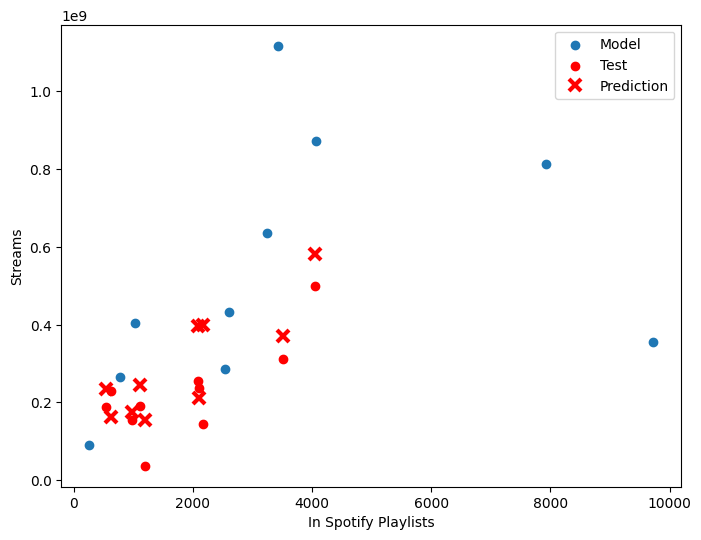

In [12]:
min_target = data_desc['streams']['min']
max_target = data_desc['streams']['max']

# Inverse the Min-Max scaling transformation
y_test_original = y_test * (max_target - min_target) + min_target
y_pred_original = y_pred * (max_target - min_target) + min_target
y_train_originall = y_train * (max_target - min_target) + min_target

min_sp = data_desc['in_spotify_playlists']['min']
max_sp = data_desc['in_spotify_playlists']['max']

X_train_Spotify = X_train[:, [1]] * (max_sp - min_sp) + min_sp
X_test_Spotify = X_test[:, [1]] * (max_sp - min_sp) + min_sp

# Print first few predicted and actual values
print("Sample Output:\nPredicted (unscaled)\tActual (unscaled)")
for i in range(10,20):
    print('{:.2f} ({:d})\t{:.2f} ({:d})'.format(y_pred[i], round(y_pred_original[i]), y_test[i], round(y_test_original[i])))


# # Visualize predicted vs actual values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, color='blue')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted')
# plt.show()


plt.figure(figsize=(8, 6))
plt.xlabel('In Spotify Playlists')
plt.ylabel('Streams')
plt.scatter(X_train_Spotify[10:20], y_train_originall[10:20])
plt.scatter(X_test_Spotify[10:20], y_test_original[10:20], color='red', marker='o')
plt.plot(X_test_Spotify[10:20], y_pred_original[10:20], 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Test', 'Prediction'])
plt.show()